In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Test with Cassandra on Google Cloud Platform

JIRA ticket: https://jira.lsstcorp.org/browse/DM-8136

First test with a setup similar to PDAC to see if we can reproduce it:
- server side:
  - 3 VMs with 32 vCPUs each
  - 64 GB RAM
  - 4x375GB local SSDs
- client side
  - either 3 or 6 VMs with 32 vCPUs
  - 16 GB RAM
  - clients running in MPI more

`apdb` keyspace is configured with 3 replicas.

In [2]:
data_files = [
    "data/DM-28136/apdb-gcp-1-20201218T230326.csv.gz",
    "data/DM-28136/apdb-gcp-1-20201219T003654.csv.gz",
    "data/DM-28136/apdb-gcp-1-20201219T063313.csv.gz",
    "data/DM-28136/apdb-gcp-1-20201219T211123.csv.gz",
    "data/DM-28136/apdb-gcp-1-20201220T003421.csv.gz",
    "data/DM-28136/apdb-gcp-1-20201220T175508.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [4]:
df_cass = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass = df_cass[(df_cass.index % 1000) < 100]

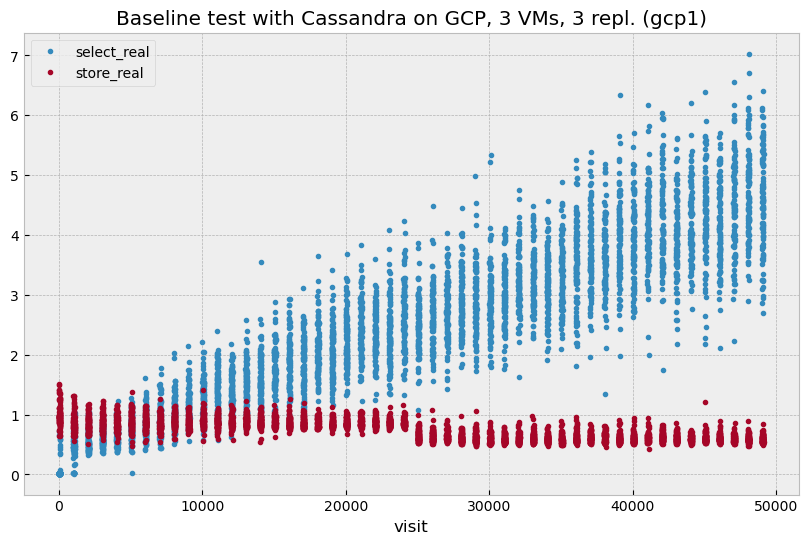

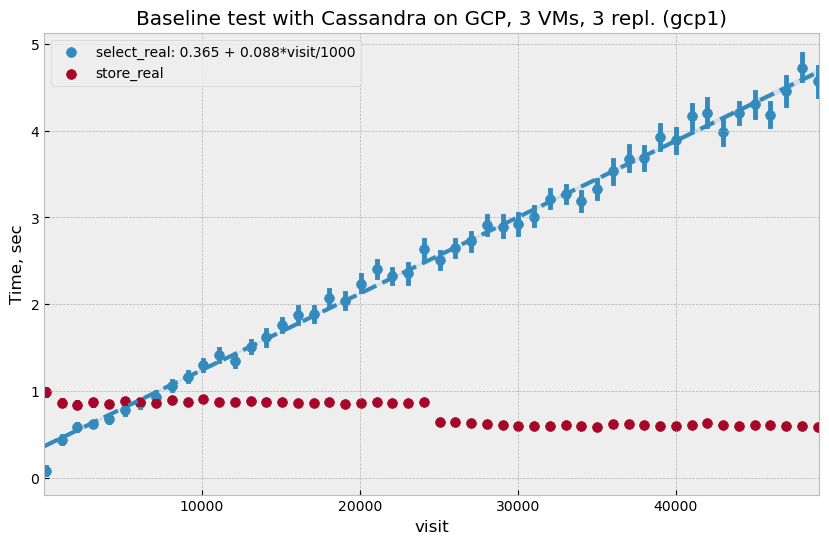

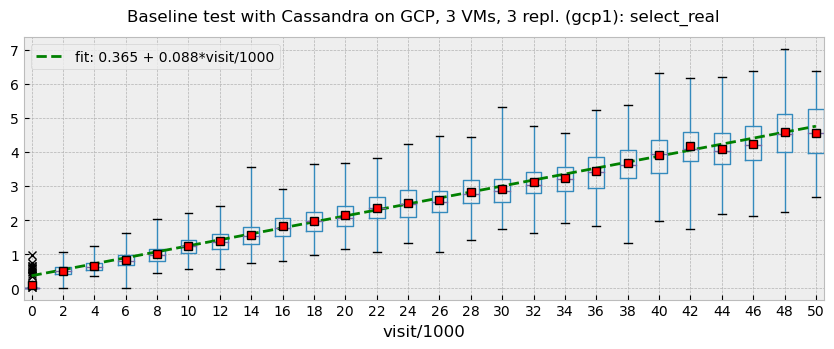

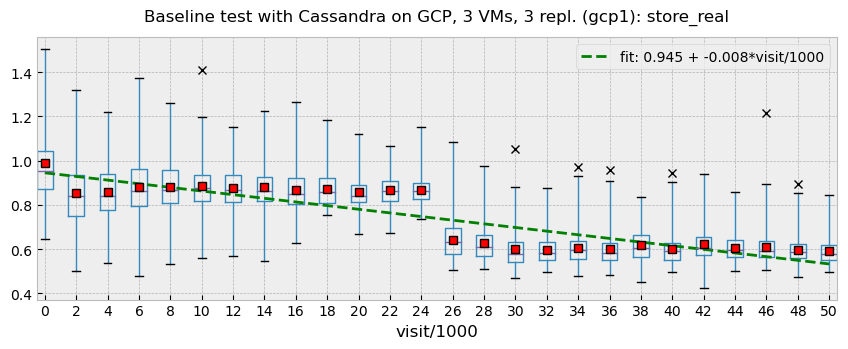

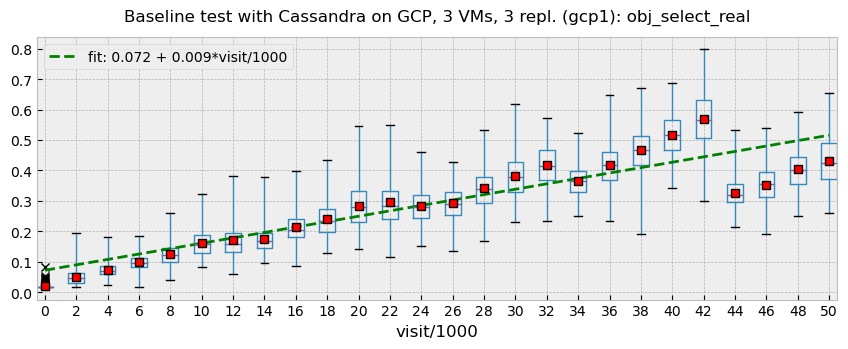

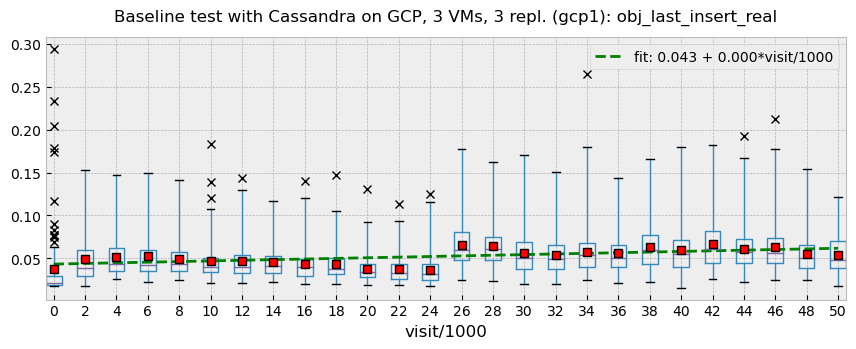

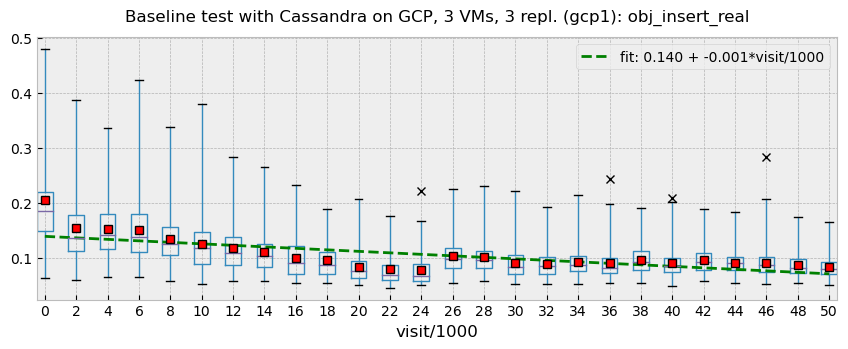

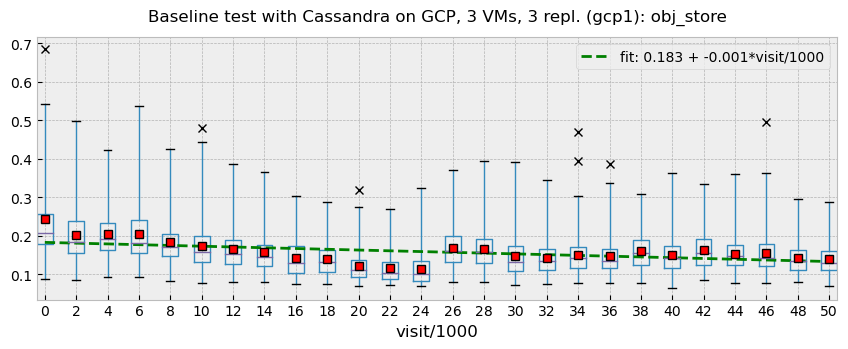

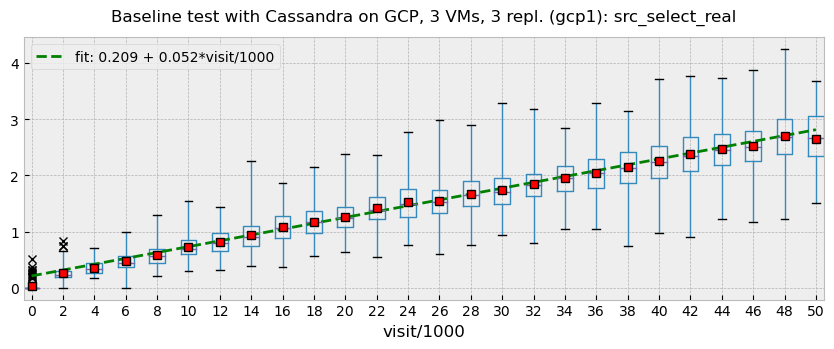

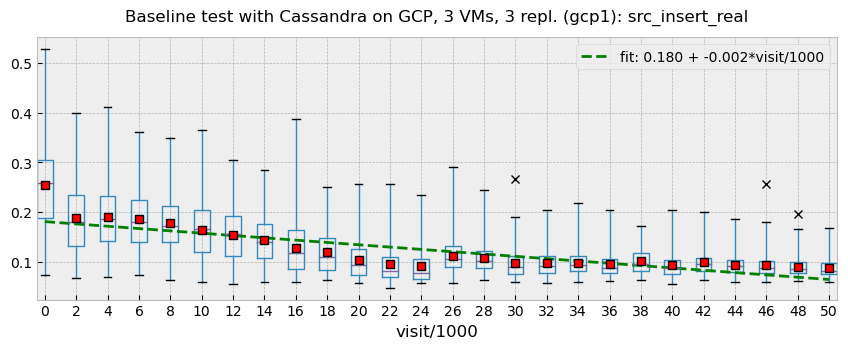

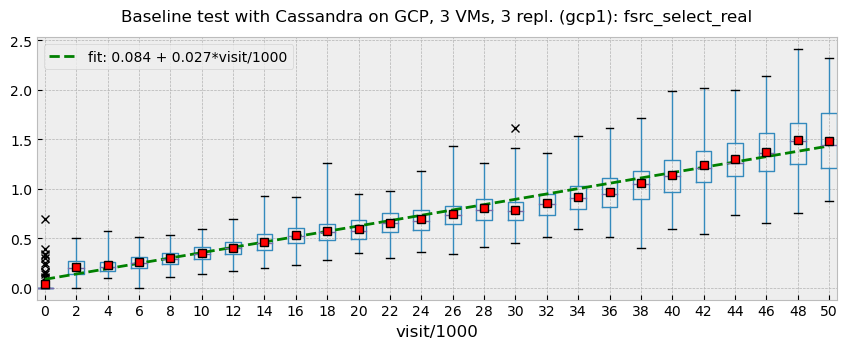

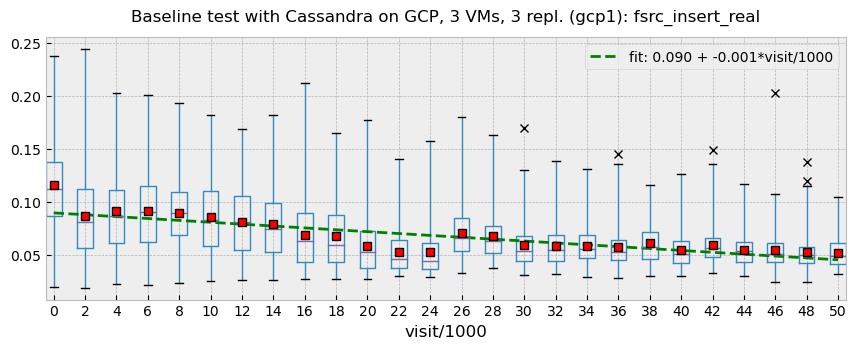

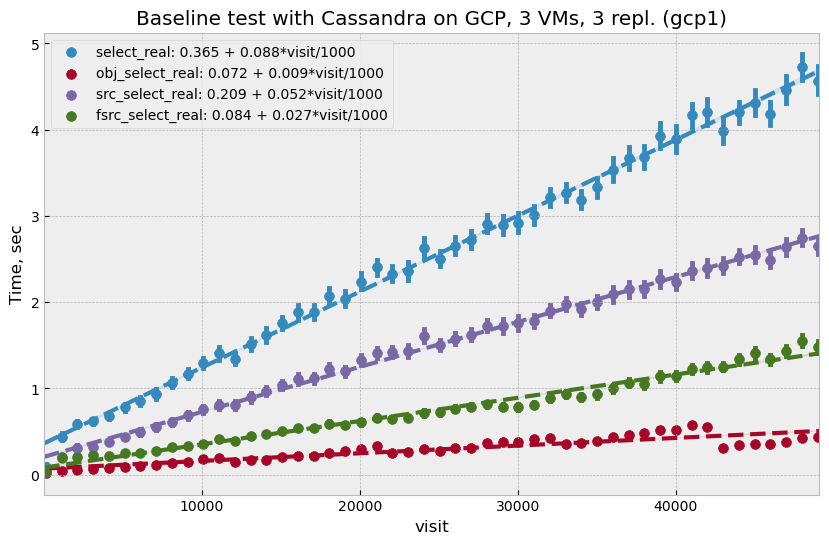

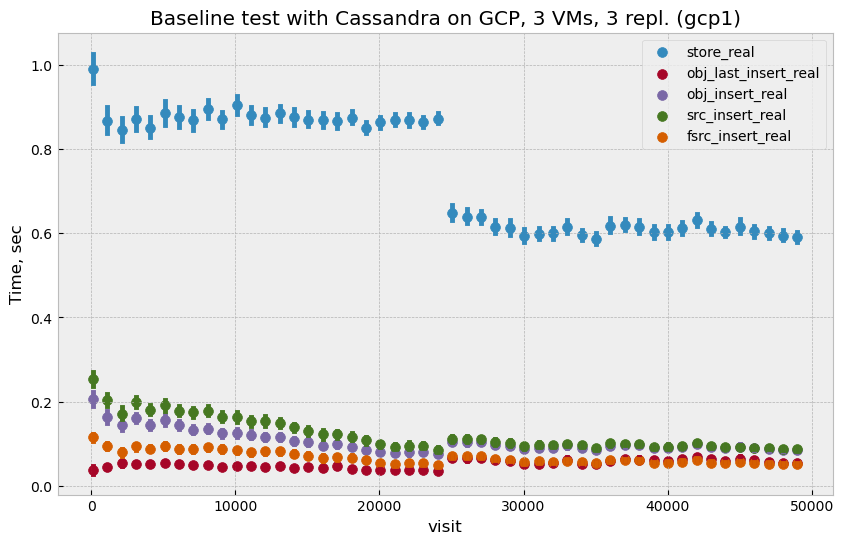

In [6]:
fit_modes = dict(
    store_real=None,
    obj_last_insert_real=None,
    src_insert_real=None,
    fsrc_insert_real=None,
    obj_insert_real=None,
)

title = "Baseline test with Cassandra on GCP, 3 VMs, 3 repl. (gcp1)"
plots.do_plots_all(df_cass, title, bin=2000, plots=all_plots, whis=whiskers, fit_modes=fit_modes);